In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_one = pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_one.pkl')
df_two = pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_two.pkl')
df_three = pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_three.pkl')
df_four = pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_four.pkl')

In [7]:
frame_one = pd.DataFrame(
    pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_one.pkl')).T.reset_index()
frame_two = pd.DataFrame(
    pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_two.pkl')).T.reset_index()
frame_three = pd.DataFrame(
    pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_three.pkl')).T.reset_index()
frame_four = pd.DataFrame(
    pd.read_pickle('/home/elrazia/rap_lyrics/notebooks/corpora/corpus_four.pkl')).T.reset_index()

In [3]:
# CLEAN CODE LATER
# for filename in os.listdir('/home/elrazia/notebooks/corpora/'):

## Cleaning

#### Frame Manipulation

In [39]:
#frame_one = pd.DataFrame(df_one).T.reset_index()
#frame_two = pd.DataFrame(df_two).T.reset_index()
#frame_three = pd.DataFrame(df_three).T.reset_index()
#frame_four = pd.DataFrame(df_four).T.reset_index()

In [40]:
#frame_one.columns = ['title', 'artist', 'date', 'lyrics']
#frame_two.columns = ['title', 'artist', 'date', 'lyrics']
#frame_three.columns = ['title', 'artist', 'date', 'lyrics']
#frame_four.columns = ['title', 'artist', 'date', 'lyrics']

In [2]:
#frame_one.head()

In [42]:
def year_grab(date_array):
    
    ''' Takes in array of dates, returns new array containing only year'''
    
    new_dates = []
    for date in date_array:
        if len(date)>0:
            new_dates.append(int(date.strip().split(', ')[1]))
        else:
            new_dates.append(date)
    return new_dates

In [43]:
# Convert 'date' column to only year values
#frame_one['date'] = year_grab(frame_one.date)
#frame_two['date'] = year_grab(frame_two.date)
#frame_three['date'] = year_grab(frame_three.date)
#frame_four['date'] = year_grab(frame_four.date)

In [44]:
# Drop rows with release dates prior to 1980
#frame_one = frame_one[frame_one.date > 1980]
#frame_two = frame_two[frame_two.date > 1980]
#frame_three = frame_three[frame_three.date > 1980]
#frame_four = frame_four[frame_four.date > 1980]

In [9]:
# Concat into giant frame
#grand_frame = pd.concat([frame_one, frame_two, frame_three, frame_four]).reset_index()
#grand_frame = grand_frame.drop('index', axis=1)

In [10]:
#with open('grand_frame.pkl', 'wb') as writefile:
#    pickle.dump(grand_frame, writefile)

In [3]:
with open('grand_frame.pkl', 'rb') as readfile:
    grand_frame = pickle.load(readfile)

In [29]:
grand_frame.shape

(46621, 5)

### Text Cleaning

In [41]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all numbers
    3. Returns a list of the cleaned text
    """
    # Punct and Lower
    nopunc = [char.lower() for char in mess if char not in string.punctuation]

    # Numbers
    nonumb = [char for char in nopunc if char not in '0123456789']
    
    # Join the characters again to form the string.
    clean = ''.join(nonumb)
    
    return [word.lower().split('\\')[0] for word in clean.split()]

## Vectorize

#### TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
Tvectorizer = TfidfVectorizer(analyzer=text_process, min_df=.01, max_df=1000, max_features=20000)

In [48]:
T = Tvectorizer.fit_transform(frame_one['lyrics'])

KeyboardInterrupt: 

In [18]:
with open('tfidf.pkl', 'wb') as writefile:
    pickle.dump(T, writefile)

In [4]:
with open('tfidf.pkl', 'rb') as readfile:
    tfidf = pickle.load(readfile)

In [99]:
vocab = Tvectorizer.get_feature_names()

In [6]:
tfidf.shape

(46621, 82288)

In [27]:
print vocab

['aa', 'aaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaahhhhhhhhhhhh', 'aaaaaaaalchemist', 'aaaaaah', 'aaaaahh', 'aaaaahhh', 'aaaaass', 'aaaaat', 'aaaah', 'aaaand', 'aaadditional', 'aaaghh', 'aaah', 'aaahh', 'aaahhh', 'aaalcohol', 'aaall', 'aaalone', 'aaam', 'aaand', 'aaanother', 'aaaooo', 'aaask', 'aaawwww', 'aaawwwww', 'aaawwwwww', 'aadmi', 'aaf', 'aafs', 'aah', 'aahh', 'aahs', 'aaight', 'aailyahs', 'aain', 'aaint', 'aaj', 'aaja', 'aalamam', 'aalegra', 'aali', 'aalike', 'aalikes', 'aaliyah', 'aaliyahs', 'aall', 'aam', 'aamco', 'aan', 'aand', 'aanda', 'aankhon', 'aape', 'aapferg', 'aaprocky', 'aardvark', 'aaron', 'aarons', 'aas', 'aask', 'aat', 'aaya', 'aayhasis', 'aayi', 'ab', 'aba', 'aback', 'abacus', 'abaddon', 'abadeabade', 'abaga', 'abagnale', 'abalone', 'abandon', 'abandonded', 'abandoned', 'abandoning', 'abandonment', 'abandonner', 'abater', 'abattre', 'abattu', 'abaz', 'abba', 'abbandona', 'abbassa', 'abbasso', 'abbastanza', 'abbey', 'abbiamo', 'abboccare', 'abbot', 'abbots', 'abbott', '

## Frame reduction

In [4]:
grand_frame['primary'] = grand_frame['artist'].apply(lambda x: x[0])

In [8]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
counts_df = grand_frame['primary'].value_counts()

value_frame = pd.DataFrame({ 'primary': counts_df.index.tolist(), 
                             'counts': counts_df.values.tolist() })

In [6]:
final_frame = pd.merge(grand_frame,value_frame, on='primary')

In [7]:
ten_frame = final_frame[final_frame['counts'] > 10]

In [38]:
#ten_frame.shape

(41476, 6)

In [11]:
#fifty_frame = final_frame[final_frame['counts'] > 50]

In [40]:
#fifty_frame.shape

(33201, 6)

### Model Again

In [42]:
Tvectorizer = TfidfVectorizer(analyzer=text_process, min_df=.01, max_df=.9, max_features=20000)

In [43]:
T = Tvectorizer.fit_transform(ten_frame['lyrics'])

In [12]:
#with open('ten.pkl', 'wb') as writefile:
#    pickle.dump(T, writefile)

In [9]:
with open('ten.pkl', 'rb') as readfile:
    T = pickle.load(readfile)

In [45]:
vocab = Tvectorizer.get_feature_names()

In [13]:
#with open('fifty.pkl', 'wb') as writefile:
#    pickle.dump(T, writefile)

In [55]:
#with open('fifty_tenthou.pkl', 'wb') as writefile:
#    pickle.dump(T, writefile)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
prin_var = pca.fit(T.toarray()) 
principal = pca.fit_transform(T.toarray())

In [11]:
pvars = prin_var.explained_variance_

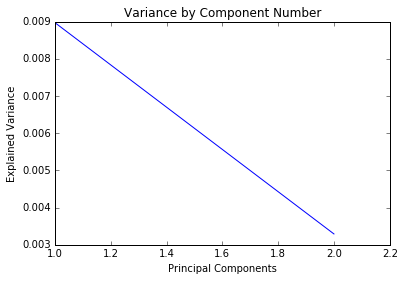

In [16]:
plt.plot(range(1,len(pvars)+1),pvars)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

In [17]:
from sklearn.cluster import KMeans

In [18]:
#model = KMeans(n_clusters=8).fit(T)
model = KMeans(n_clusters=3).fit(principal)

In [19]:
#kmean = model.predict(T)
kmean = model.predict(principal)

In [20]:
ten_frame['kmean_pca'] = kmean

/home/elrazia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
ten_frame.head()

,title,artist,date,lyrics,primary,counts,kmean_pca
9,"""Clapping For The Wrong Reasons"" Screenplay","[Childish Gambino, F.A.M., ...",,DONALD. (a beat). You called me. This is the C...,Childish Gambino,237,0
10,"""ask me words"" - bino (notero is here too)","[Childish Gambino, Forum Q&As]",2013,I guess oldest computer mackelmore was suppose...,Childish Gambino,237,0
11,49ers (Orange Shirt),"[Childish Gambino, DC Pierso...",2010,Ask you something:. Do you think I'm common li...,Childish Gambino,237,0
12,5 Fingers of Death (Freestyle),"[Childish Gambino, Sway ...",,"We gon' rock at least 5 beats, to show your ve...",Childish Gambino,237,0
13,@thegoldmolar,"[Childish Gambino, because the internet Screen...",,. . . . . . . . . . . . .,Childish Gambino,237,2


In [21]:
ten_frame.kmean_pca.value_counts()

2    24088
0    16710
1      678
Name: kmean_pca, dtype: int64

In [51]:
ten_frame.date.value_counts()

        23185
2015     2703
2014     2486
2013     2371
2012     1593
2016     1554
2011     1238
2010      756
2009      645
2008      502
2007      392
2006      381
2005      349
2000      286
1999      269
2004      247
2003      234
1998      203
2002      203
2001      192
1996      157
1997      156
1995      139
1994      112
1993      110
1992       87
1990       66
1989       54
1991       54
1988       40
1987       20
1986        7
1981        4
1984        2
1982        1
Name: date, dtype: int64

In [279]:
ten_frame[ten_frame['kmean_pca'] == 0]

,title,artist,date,lyrics,primary,counts,kmean_pca
14,All Yall,"[Childish Gambino, Timbaland...",2014,"Watch me get it in, spin in the seat, black as...",Childish Gambino,237,0
18,Arrangement,"[Childish Gambino, Gonage ...",,"I got yo bitch layin' naked 'cross the bed, no...",Childish Gambino,237,0
22,Backpackers,"[Childish Gambino, Childish ...",,"That well-spoken token,. who ain't been heard....",Childish Gambino,237,0
31,Black Faces,"[Childish Gambino, Nipsey Hu...",,"No punch, you know that mean that we workin' h...",Childish Gambino,237,0
32,Body,"[Childish Gambino, Prodigy (...",,Childish Gambino greater than sign everyone. A...,Childish Gambino,237,0
39,Candler Road,"[Childish Gambino, Childish ...",,"Room service like 2K, NBA, I'm ballin', nigga....",Childish Gambino,237,0
40,Centipede,"[Childish Gambino, Childish ...",,"We lost all of our whoa-oh, sad love songs. He...",Childish Gambino,237,0
49,Dream / Southern Hospitality / Partna Dem,"[Childish Gambino, KC Da Bea...",2014,"I ran Atlanta, and I was on every radio statio...",Childish Gambino,237,0
55,For Your Love (Freestyle),[Childish Gambino],,I keep a girl shaky like her pussy lips is kru...,Childish Gambino,237,0
59,Fuck Your Blog,"[Childish Gambino, Yung Humm...",,And some blogs be talking smack. Been chill to...,Childish Gambino,237,0


In [276]:
twothousandten_frame = ten_frame[(ten_frame['date'] >= 2010)]
twothousand_frame = ten_frame[(ten_frame['date'] > 1999) & (ten_frame['date'] < 2010)]
nineties_frame = ten_frame[(ten_frame['date'] > 1989) & (ten_frame['date'] < 2000)]
eighties_frame = ten_frame[(ten_frame['date'] < 1990)]

In [161]:
tvectorizer10 = TfidfVectorizer(analyzer='word', min_df=.01, max_df=1000, max_features=20000, 
                              stop_words=stopwords)
tvectorizer00 = TfidfVectorizer(analyzer='word', min_df=.01, max_df=1000, max_features=20000, 
                              stop_words=stopwords)
tvectorizer90 = TfidfVectorizer(analyzer='word', min_df=.01, max_df=1000, max_features=20000, 
                              stop_words=stopwords)
tvectorizer80 = TfidfVectorizer(analyzer='word', min_df=.01, max_df=1000, max_features=20000, 
                              stop_words=stopwords)

tfidf10 = tvectorizer10.fit_transform(twothousandten_frame['lyrics'])
tfidf00 = tvectorizer00.fit_transform(twothousand_frame['lyrics'])
tfidf90 = tvectorizer90.fit_transform(nineties_frame['lyrics'])
tfidf80 = tvectorizer80.fit_transform(eighties_frame['lyrics'])

In [164]:
twothousandten_vocab = Tvectorizer10.get_feature_names()
twothousand_vocab = Tvectorizer00.get_feature_names()
ninety_vocab = Tvectorizer90.get_feature_names()
eighty_vocab = Tvectorizer80.get_feature_names()

In [167]:
ninety_vocab == eighty_vocab

False

#### PCA

In [178]:
from sklearn.decomposition import PCA

pca10 = PCA(n_components=3)
prin_var10 = pca.fit(twothousandten_tfidf.toarray()) 
principal10 = pca.fit_transform(twothousandten_tfidf.toarray())

pca00 = PCA(n_components=3)
prin_var00 = pca.fit(twothousand_tfidf.toarray()) 
principal00 = pca.fit_transform(twothousand_tfidf.toarray())

In [179]:
pca90 = PCA(n_components=3)
prin_var90 = pca.fit(ninety_tfidf.toarray()) 
principal90 = pca.fit_transform(ninety_tfidf.toarray())

pca80 = PCA(n_components=3)
prin_var80 = pca.fit(eighty_tfidf.toarray()) 
principal80 = pca.fit_transform(eighty_tfidf.toarray())

In [170]:
pvars10 = prin_var10.explained_variance_
pvars00 = prin_var00.explained_variance_
pvars90 = prin_var90.explained_variance_
pvars80 = prin_var80.explained_variance_

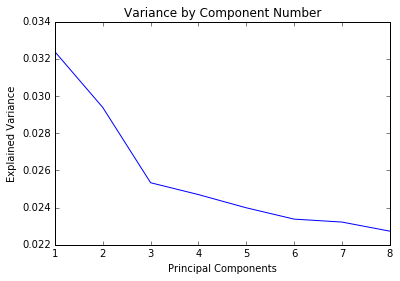

In [172]:
plt.plot(range(1,len(pvars90)+1),pvars90)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

In [190]:
n_inertia10 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal10)
    pca_clusters_array = km.predict(principal10)
    inertia = km.inertia_
    n_inertia10.append(inertia)
    
n_inertia00 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal00)
    pca_clusters_array = km.predict(principal00)
    inertia = km.inertia_
    n_inertia00.append(inertia)
    
n_inertia90 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal90)
    pca_clusters_array = km.predict(principal90)
    inertia = km.inertia_
    n_inertia90.append(inertia)
    
n_inertia80 = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal80)
    pca_clusters_array = km.predict(principal80)
    inertia = km.inertia_
    n_inertia80.append(inertia)

In [1]:
plt.plot(range(1,15),n_inertia80)
plt.xlabel('# of Clusters')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

NameError: name 'plt' is not defined

In [189]:
len(n_inertia10)

0

#### KMEANS

In [293]:
model10 = KMeans(n_clusters=9).fit(principal10)
model00 = KMeans(n_clusters=9).fit(principal00)
model90 = KMeans(n_clusters=9).fit(principal90)
model80 = KMeans(n_clusters=9).fit(principal80)

In [294]:
kmean10 = model.predict(principal10)
kmean00 = model.predict(principal00)
kmean90 = model.predict(principal90)
kmean80 = model.predict(principal80)

In [295]:
twothousandten_frame['kmean_pca'] = kmean10
twothousand_frame['kmean_pca'] = kmean00
nineties_frame['kmean_pca'] = kmean90
eighties_frame['kmean_pca'] = kmean80

In [297]:
eighties_frame.kmean_pca.value_counts()

1    35
3    32
0    32
2    29
Name: kmean_pca, dtype: int64

In [256]:
nineties_frame[nineties_frame['kmean_pca'] == 2].primary.value_counts()

Big Daddy Kane                         21
Raekwon                                18
Nas                                    14
Slick Rick                             13
Rakim                                  12
RZA                                    12
Killah Priest                          12
GZA                                    10
The Notorious B.I.G.                    9
Kool G. Rap                             8
Ghostface Killah                        8
Ice Cube                                7
Jay Z                                   6
Diamond D & The Psychotic Neurotics     5
Big Punisher                            5
Method Man                              5
Queen Latifah                           5
Missy Elliott                           4
The Roots                               4
Capone N Noreaga                        4
Lord Finesse & DJ Mike Smooth           4
Guru                                    4
Mase                                    4
The Simpsons                      

#### LDA

In [232]:
lda10 = LatentDirichletAllocation(n_topics=20, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda00 = LatentDirichletAllocation(n_topics=20, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda90 = LatentDirichletAllocation(n_topics=20, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda80 = LatentDirichletAllocation(n_topics=20, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0)
lda10.fit(twothousandten_tfidf)
lda00.fit(twothousand_tfidf)
lda90.fit(ninety_tfidf)
lda80.fit(eighty_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=20, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [233]:
topic_word10 = lda10.components_
topic_word00 = lda00.components_
topic_word90 = lda90.components_
topic_word80 = lda80.components_

In [239]:
n_top_words = 10
for i, topic_dist in enumerate(topic_word90):
    topic_words = np.array(ninety_vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: like back see smoking pimp deep im similar bullshit nice
Topic 1: im like verse back way live ill get dont niggas
Topic 2: brew st like tha jigga planet got niggas brothers im
Topic 3: da sleeping peace need feel clips ive gift blasted legs
Topic 4: im like niggas know ha hah got yall keep lock
Topic 5: got like mean niggas im need daddy boy get bad
Topic 6: got im say man like hold time wipe home lock
Topic 7: niggas im goin raw mine shit like man mom found
Topic 8: im like cause got man ease girls blasted pain da
Topic 9: like big man ha must ya go niggas im dont
Topic 10: im like man niggas god get nigga know shit got
Topic 11: rear step im cash jimmy know hat gold stop lot
Topic 12: like niggas im got yo never gonna cause say hell
Topic 13: dance desert gots eagle times devil lets watch little nowadays
Topic 14: like stole quit rae similar seats balls words heroin york
Topic 15: like niggas im get shit raw knock cause nigga fuck
Topic 16: like im yall get shit dont back ni

#### NMF

In [ ]:
from sklearn.decomposition import NMF

In [258]:
n_samples = 2000
n_features = 1000
n_topics = 5
n_top_words = 8

In [241]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [252]:
nmf10 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(twothousandten_tfidf)
nmf00 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(twothousand_tfidf)
nmf90 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(ninety_tfidf)
nmf80 = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(eighty_tfidf)

In [259]:
print_top_words(nmf10, twothousandten_vocab, n_top_words)

Topic #0:
like got em black get big rap yall
Topic #1:
dont know get aint never got cause love
Topic #2:
nigga niggas bitch fuck shit got aint money
Topic #3:
im bitch fuck fucking yeah shit cause bitches
Topic #4:
ya get wit yo em ass wanna imma
()


In [22]:
# Remove foreign
ten_frame = ten_frame[ten_frame['kmean_pca'] != 1]

In [27]:
with open('foreign_removed.pkl', 'wb') as writefile:
    pickle.dump(ten_frame, writefile)

In [31]:
n_inertia = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal)
    pca_clusters_array = km.predict(principal)
    inertia = km.inertia_
    n_inertia.append(inertia)

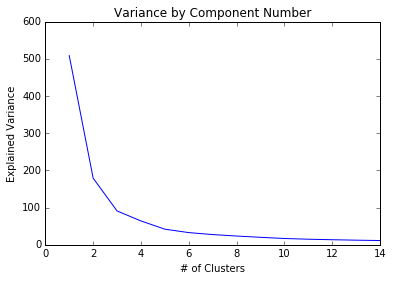

In [32]:
plt.plot(range(1,15),n_inertia)
plt.xlabel('# of Clusters')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

## Topic Modeling

In [34]:
from sklearn.decomposition import LatentDirichletAllocation

In [89]:
lda = LatentDirichletAllocation(n_topics=20, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
lda.fit(T)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=20, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [90]:
topic_word = lda.components_

In [92]:
topic_word.shape[1]

1666

In [50]:
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: loved chop chopper chillin neck killers havent brain
Topic 1: job loud knows freak lame looking kendrick hanging
Topic 2: age calm knees check holy look boom deck
Topic 3: crowd enemy man eating bullet best little beautiful
Topic 4: kill goin baby brother balling focus dash cell
Topic 5: cold crack cocaine jet believe get enough dogs
Topic 6: hits eight front glass left bright coupe asked
Topic 7: mention least biggest flip atlanta lying better fo
Topic 8: cost months acting busy make gun first dollars
Topic 9: bullshit california bodies bridge bands beat jail huh
Topic 10: chest ladies chilling de made fresh child future
Topic 11: happens drug death aim finish fly hands duck
Topic 12: god ak crew dr live f leaves early
Topic 13: bar heavy flash eyes hoping hot blast louis
Topic 14: holdin fix lead holding miss fall mob control
Topic 15: glock arms hello broad deserve cook leather cash
Topic 16: lane needed car doubt lyrical fine lose jack
Topic 17: near gas dawg blunts histor

## Foreign Removed

In [67]:
T = Tvectorizer.fit_transform(ten_frame['lyrics'])

KeyboardInterrupt: 

In [68]:
vocab = Tvectorizer.get_feature_names()

In [54]:
with open('foreign_removed.pkl', 'wb') as writefile:
    pickle.dump(T, writefile)

In [12]:
with open('foreign_removed.pkl', 'rb') as readfile:
    T = pickle.load(readfile)

In [55]:
model = KMeans(n_clusters=12).fit(T)
#model = KMeans(n_clusters=3).fit(principal)

In [67]:
n_inertia = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init=25, n_jobs=-1)
    kmeans_pca_array = km.fit_transform(principal)
    pca_clusters_array = km.predict(principal)
    inertia = km.inertia_
    n_inertia.append(inertia)

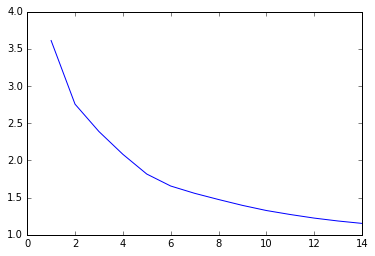

In [68]:
plt.plot(range(1,15),n_inertia)

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
prin_var = pca.fit(T.toarray()) 
principal = pca.fit_transform(T.toarray())

In [70]:
pvars = prin_var.explained_variance_

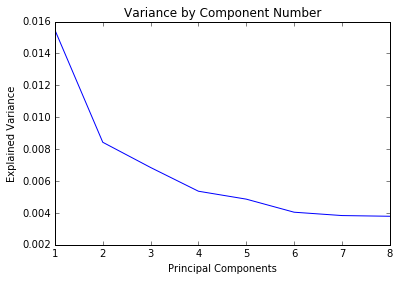

In [71]:
plt.plot(range(1,len(pvars)+1),pvars)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Variance by Component Number')

In [72]:
#model = KMeans(n_clusters=8).fit(T)
model = KMeans(n_clusters=4).fit(principal)

In [73]:
#kmean = model.predict(T)
kmean = model.predict(principal)

In [74]:
ten_frame['kmean_pca'] = kmean

In [75]:
ten_frame.kmean_pca.value_counts()

3    15282
1    10498
2     7828
0     7190
Name: kmean_pca, dtype: int64

In [76]:
ten_frame[ten_frame['kmean_pca'] == 0]

,title,artist,date,lyrics,primary,counts,kmean_pca
14,All Yall,"[Childish Gambino, Timbaland...",2014,"Watch me get it in, spin in the seat, black as...",Childish Gambino,237,0
18,Arrangement,"[Childish Gambino, Gonage ...",,"I got yo bitch layin' naked 'cross the bed, no...",Childish Gambino,237,0
22,Backpackers,"[Childish Gambino, Childish ...",,"That well-spoken token,. who ain't been heard....",Childish Gambino,237,0
31,Black Faces,"[Childish Gambino, Nipsey Hu...",,"No punch, you know that mean that we workin' h...",Childish Gambino,237,0
32,Body,"[Childish Gambino, Prodigy (...",,Childish Gambino greater than sign everyone. A...,Childish Gambino,237,0
39,Candler Road,"[Childish Gambino, Childish ...",,"Room service like 2K, NBA, I'm ballin', nigga....",Childish Gambino,237,0
40,Centipede,"[Childish Gambino, Childish ...",,"We lost all of our whoa-oh, sad love songs. He...",Childish Gambino,237,0
49,Dream / Southern Hospitality / Partna Dem,"[Childish Gambino, KC Da Bea...",2014,"I ran Atlanta, and I was on every radio statio...",Childish Gambino,237,0
55,For Your Love (Freestyle),[Childish Gambino],,I keep a girl shaky like her pussy lips is kru...,Childish Gambino,237,0
59,Fuck Your Blog,"[Childish Gambino, Yung Humm...",,And some blogs be talking smack. Been chill to...,Childish Gambino,237,0


In [129]:
ten_frame[ten_frame['kmean_pca'] == 0].primary.value_counts()

The Game                236
Lil Wayne               185
Meek Mill               141
Rick Ross               140
J. Cole                 140
Chief Keef              139
50 Cent                 133
Tyga                    112
Waka Flocka Flame       105
Gucci Mane              102
Wiz Khalifa             100
Freddie Gibbs            96
Lil Durk                 93
Jay Z                    92
Wale                     89
French Montana           87
Tyler, The Creator       85
ScHoolboy Q              80
Juicy J                  78
The Notorious B.I.G.     75
Future                   75
Lil B                    75
Fabolous                 71
Nas                      69
Ice Cube                 63
Nipsey Hussle            61
Young Thug               59
Danny Brown              59
Lil Bibby                58
Boosie Badazz            56
                       ... 
Krizz Kaliko              1
Shad Fer                  1
Bishop Lamont             1
Glasses Malone            1
Kidd Kidd           

## Tokenizing and Stemming

In [115]:
from nltk.stem.porter import PorterStemmer
import nltk
import re

In [101]:
stemmer = PorterStemmer()

In [118]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [PorterStemmer().stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in ten_frame['lyrics']:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
Tvectorizer = TfidfVectorizer(analyzer=text_process, min_df=.01, max_features=10000, tokenizer=PorterStemmer)

## NMF

In [86]:
from sklearn.decomposition import NMF

In [105]:
n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 8

In [87]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [107]:
nmf = NMF(n_components=n_topics, alpha=.1, l1_ratio=.5).fit(T)

In [130]:
tfidf_feature_names = Tvectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, 10)

Topic #0:
dumb eight fifty epmd cases grand science asses follow hung
Topic #1:
jaw droppin scream aids groove ends arm lyrical finally position
Topic #2:
grip begin dollars louis beating marley saw heat hand ball
Topic #3:
fo broken peel practice fifty dying flying droptop black box
Topic #4:
ghost eight grams epmd met album ends aids coming mr
Topic #5:
save ross science arm flying chips living million blast drops
Topic #6:
coming remorse droppin jacks ease broken breeze lyrics met cuban
Topic #7:
months aids droppin position saw droptop playing science lyrical louis
Topic #8:
enter hung aids beating blast fingers beers scream jakes bright
Topic #9:
ass harder early remorse juice jacks enough poisonous grams earth
Topic #10:
help science blast chose begin beating faggot scream breaking jumpin
Topic #11:
crowd poisonous grams finally games living box follow ross droppin
Topic #12:
jay saw lyrical droppin aids beers hung flames arm eyes
Topic #13:
saying juice rate position manifest fi

In [ ]:
Tvectorizer = TfidfVectorizer(analyzer=text_process, min_df=.01, max_df=.9, max_features=20000)

In [109]:
temp_frame = ten_frame

In [120]:
temp_frame['lyrics'] = temp_frame['lyrics'].apply(tokenize_and_stem)

KeyboardInterrupt: 